**Huiswerk les 1**

In [198]:
import pandas as pd
pd.__version__

'1.4.2'

**Hoofdstuk 2**

In [199]:
myvar = 42
myvar

42

In [200]:
H = 1.76
W = 7
BMI_Jeane = W / H ** 2
BMI_Jeane

2.259814049586777

In [201]:
Hc = 1.83
Wc = 75
BMI_Camiel = Wc / Hc ** 2

Ht = 1.92
Wt = 80
BMI_Thorsten = Wt / Ht ** 2

print("laagste BMI is", min(BMI_Camiel, BMI_Thorsten))
print("Hoogste BMI is", max(BMI_Camiel, BMI_Thorsten))

laagste BMI is 21.70138888888889
Hoogste BMI is 22.395413419331717


**Hoofdstuk 3**

we werken met data van het Centraal bureau voor Statestiek over de kippen boederijen van 2017

In [202]:
kippen_df = pd.read_excel('chickenfarms.xls', nrows=62, header=1, index_col=0)
kippen_df.columns = ['farms', 'chickens']
kippen_df.describe()

,farms,chickens
count,62.000000,6.200000e+01
mean,6.935484,4.501999e+05
std,7.201710,5.399613e+05
min,0.000000,0.000000e+00
25%,2.000000,7.272750e+04
50%,4.500000,2.800745e+05
75%,10.000000,5.689490e+05
max,31.000000,2.752468e+06


In [203]:
kippen_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, Alphen-Chaam to Zundert
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   farms     62 non-null     int64
 1   chickens  62 non-null     int64
dtypes: int64(2)
memory usage: 1.5+ KB


In [204]:
kippen_df.head(5)

,farms,chickens
Alphen-Chaam,10,1182585
Altena,7,303925
Asten,19,1350546
Baarle-Nassau,5,384568
Bergeijk,11,908843


In [205]:
kippen_df.tail(10)

,farms,chickens
Steenbergen,7,206520
Tilburg,2,88050
Uden,15,1024316
Valkenswaard,2,21300
Veldhoven,2,64587
Vught,0,0
Waalre,0,0
Waalwijk,0,0
Woensdrecht,2,136579
Zundert,6,790954


In [206]:
kippen_df.shape

(62, 2)

In [207]:
List_1 = ()
list_2 = "Sjoerd Barten"
list_3 = 3,1,4,1
print(list_2, list_3)

Sjoerd Barten (3, 1, 4, 1)


In [208]:
kippen_df.loc['Meierijstad', 'chickens']/kippen_df.loc['Meierijstad', 'farms']

43737.0

In [209]:
kippen_df.loc[['Geertruidenberg', 'Steenbergen', 'Moerdijk'], 'chickens']
#Dus moerdijk heeft de meeste kippen

Geertruidenberg     90000
Steenbergen        206520
Moerdijk           301555
Name: chickens, dtype: int64

In [210]:
farms = kippen_df.loc[:, 'farms']
farms.describe()

count    62.000000
mean      6.935484
std       7.201710
min       0.000000
25%       2.000000
50%       4.500000
75%      10.000000
max      31.000000
Name: farms, dtype: float64

In [211]:
chickens = kippen_df.loc[:, 'chickens']
chickens.describe()

count    6.200000e+01
mean     4.501999e+05
std      5.399613e+05
min      0.000000e+00
25%      7.272750e+04
50%      2.800745e+05
75%      5.689490e+05
max      2.752468e+06
Name: chickens, dtype: float64

In [212]:
#What is the largest number of farms in a single municipality?
print('De gemeente met de meeste kippenboederijen is', farms.idxmax(), 'met', farms.max(),  'boederijen en', chickens[farms.idxmax()], 'kippen')
print()
#How many chickens were commercially held in the province of Noord-Brabant in 2017?
print('Er waren', chickens.sum(), 'kippen in Noord-Brabant in 2017')
print()
#Which municipality has the fewest chickens?
print('De gemeente met de minste kippen is', chickens.idxmin(), 'met', chickens[farms.idxmax()], 'kippen verdeeld over', farms[chickens.idxmax()], 'boederijen')
print()
#What are the five municipalities with the largest number of chickens.
print('De 5 gemeenstens met de meeste kippen zijn:')
print(chickens.nlargest(5))

De gemeente met de meeste kippenboederijen is Someren met 31 boederijen en 2752468 kippen

Er waren 27912392 kippen in Noord-Brabant in 2017

De gemeente met de minste kippen is Breda met 2752468 kippen verdeeld over 31 boederijen

De 5 gemeenstens met de meeste kippen zijn:
Someren         2752468
Bernheze        2379370
Boxmeer         1443935
Asten           1350546
Alphen-Chaam    1182585
Name: chickens, dtype: int64


<AxesSubplot:>

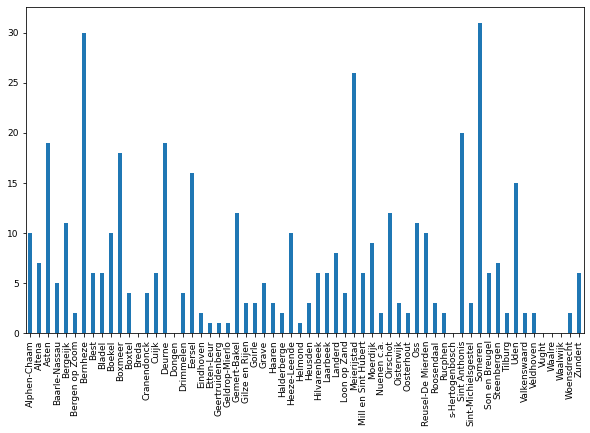

In [213]:
farms.plot(kind='bar',
           figsize=[10,6],
           fontsize=9)

<AxesSubplot:>

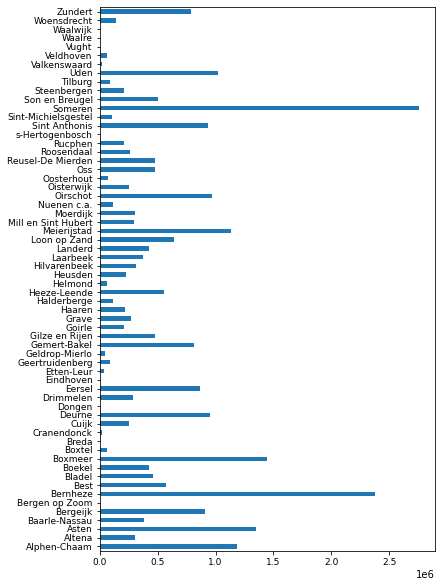

In [214]:
chickens.plot(
           kind='barh',
           figsize=[6,10],
           fontsize=9)

<AxesSubplot:ylabel='Frequency'>

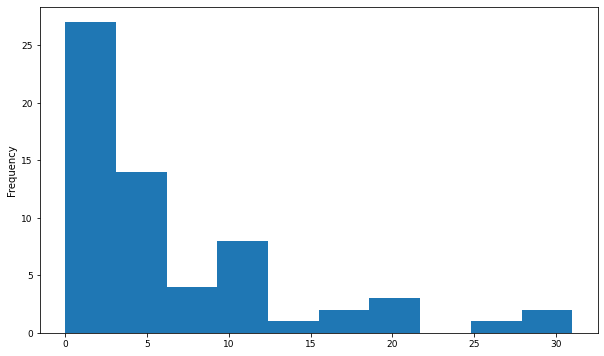

In [215]:
farms.plot(
    kind='hist',
    figsize= [10, 6],
    fontsize= 9)

In [216]:
avgchick = chickens/farms
avgchick.describe()

count        56.000000
mean      62179.112710
std       32823.643102
min         117.500000
25%       43461.805195
50%       56485.000000
75%       79538.902778
max      160125.000000
dtype: float64

In [217]:
kippen_df.loc[:, 'avgchick'] = avgchick
kippen_df.loc[:, 'MSCS'] = farms/(chickens/1000000)**2
kippen_df

,farms,chickens,avgchick,MSCS
Alphen-Chaam,10,1182585,118258.500000,7.150481
Altena,7,303925,43417.857143,75.781848
Asten,19,1350546,71081.368421,10.416812
Baarle-Nassau,5,384568,76913.600000,33.808330
Bergeijk,11,908843,82622.090909,13.317262
...,...,...,...,...
Vught,0,0,NaN,NaN
Waalre,0,0,NaN,NaN
Waalwijk,0,0,NaN,NaN
Woensdrecht,2,136579,68289.500000,107.216627


In [218]:
print('De gemeente met de laagste MSCS is', kippen_df.MSCS.idxmin(), 'met een score van', kippen_df.MSCS.min())
print()
print('De gemeente met de hoogste MSCS is', kippen_df.MSCS.idxmax(), 'met een score van', kippen_df.MSCS.max())

De gemeente met de laagste MSCS is Someren met een score van 4.091825802729862

De gemeente met de hoogste MSCS is Bergen op Zoom met een score van 36215482.1186057


In [219]:
no_farm = farms == 0
kippen_df.loc[no_farm,:]

,farms,chickens,avgchick,MSCS
Breda,0,0,NaN,NaN
Dongen,0,0,NaN,NaN
s-Hertogenbosch,0,0,NaN,NaN
Vught,0,0,NaN,NaN
Waalre,0,0,NaN,NaN
Waalwijk,0,0,NaN,NaN


In [220]:
few_farms= farms < 10
print(chickens.loc[few_farms].sum())

9262710


In [221]:
print(farms.loc[(farms == 0) | (farms == 1) | (farms > 25)])

Bernheze           30
Breda               0
Dongen              0
Etten-Leur          1
Geertruidenberg     1
Geldrop-Mierlo      1
Helmond             1
Meierijstad        26
s-Hertogenbosch     0
Someren            31
Vught               0
Waalre              0
Waalwijk            0
Name: farms, dtype: int64


**Hoofdstuk 4**

In [222]:
farms_10plus = farms > 10
kippen_df.loc[farms_10plus,:].avgchick.idxmax()


'Someren'

In [223]:
mid_chick = (chickens.loc[(chickens > 700000) & (chickens < 5000000)])
print(mid_chick.loc[(mid_chick < mid_chick.mean())])


Alphen-Chaam     1182585
Bergeijk          908843
Deurne            953200
Eersel            867378
Gemert-Bakel      814205
Meierijstad      1137162
Oirschot          965214
Sint Anthonis     933833
Uden             1024316
Zundert           790954
Name: chickens, dtype: int64


In [224]:
mid_chick.mean()

1250286.357142857

In [225]:
kippen_df

,farms,chickens,avgchick,MSCS
Alphen-Chaam,10,1182585,118258.500000,7.150481
Altena,7,303925,43417.857143,75.781848
Asten,19,1350546,71081.368421,10.416812
Baarle-Nassau,5,384568,76913.600000,33.808330
Bergeijk,11,908843,82622.090909,13.317262
...,...,...,...,...
Vught,0,0,NaN,NaN
Waalre,0,0,NaN,NaN
Waalwijk,0,0,NaN,NaN
Woensdrecht,2,136579,68289.500000,107.216627


<AxesSubplot:title={'center':'Farms versus Chickens'}, xlabel='farms', ylabel='chickens'>

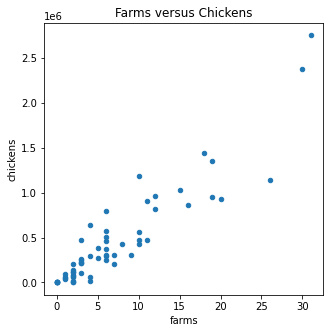

In [226]:
kippen_df.plot(
    x = 'farms',
    y= 'chickens',
    kind = 'scatter',
    figsize = (5,5),
    title = 'Farms versus Chickens'
)

In [227]:
kippen_df

,farms,chickens,avgchick,MSCS
Alphen-Chaam,10,1182585,118258.500000,7.150481
Altena,7,303925,43417.857143,75.781848
Asten,19,1350546,71081.368421,10.416812
Baarle-Nassau,5,384568,76913.600000,33.808330
Bergeijk,11,908843,82622.090909,13.317262
...,...,...,...,...
Vught,0,0,NaN,NaN
Waalre,0,0,NaN,NaN
Waalwijk,0,0,NaN,NaN
Woensdrecht,2,136579,68289.500000,107.216627


In [239]:
kippen_df['Category'] = pd.cut(
    x = kippen_df['farms'],
    bins = [-1, 0, 1, 4, 11, 10000],
    labels= ['0', '1', '2', '3', '4']
)
kippen_df

,farms,chickens,avgchick,MSCS,Category
Alphen-Chaam,10,1182585,118258.500000,7.150481,3
Altena,7,303925,43417.857143,75.781848,3
Asten,19,1350546,71081.368421,10.416812,4
Baarle-Nassau,5,384568,76913.600000,33.808330,3
Bergeijk,11,908843,82622.090909,13.317262,3
...,...,...,...,...,...
Vught,0,0,NaN,NaN,0
Waalre,0,0,NaN,NaN,0
Waalwijk,0,0,NaN,NaN,0
Woensdrecht,2,136579,68289.500000,107.216627,2


we werken met data van het Centraal bureau voor Statestiek over het aantal zonnepanelen verspreit over nederland in 2021

In [229]:
solar_df= pd.read_csv(
    'solar.csv',
    sep = ';',
    header = 0,
    index_col = 0
    )
solar_df

,Municipality,RegionType,Installations,Power
Code,,,,
NL00,Nederland,Land,960248.0,3236417.0
GM1680,Aa en Hunze,Gemeente,2573.0,10050.0
WK168000,Aa en Hunze,Wijk,408.0,1476.0
BU16800000,Aa en Hunze,Buurt,396.0,1426.0
BU16800009,Aa en Hunze,Buurt,12.0,50.0
...,...,...,...,...
BU01935200,Zwolle,Buurt,36.0,145.0
BU01935210,Zwolle,Buurt,38.0,179.0
GEM9999,NaN,NaN,NaN,NaN


In [230]:
Solar_gemeente = solar_df.loc[solar_df['RegionType'] == 'Gemeente']
print(Solar_gemeente.loc[Solar_gemeente.Installations.idxmax(), 'Municipality'], 'Met', Solar_gemeente.Installations.max(), 'zonnepanelen')


Utrecht Met 13905.0 zonnepanelen


Deze staitment is fout omdat het geen rekening houd met de grote van de gemeente waar de data vandaankomt. dit zou geen probleem zijn al het zou gaan om een procent van de popelatie

In [231]:
Solar_buurt = solar_df.loc[solar_df['RegionType'] == 'Buurt']
print(Solar_buurt.Power.idxmax(), 'Met', Solar_buurt.Power.max(), 'Power')


BU00720004 Met 4036.0 Power


In [238]:
Solar_gemeente.nsmallest(n=10, columns='Installations')

,Municipality,RegionType,Installations,Power
Code,,,,
GM0096,Vlieland,Gemeente,91.0,304.0
GM0277,Rozendaal,Gemeente,100.0,445.0
GM0088,Schiermonnikoog,Gemeente,105.0,414.0
GM0417,Laren,Gemeente,191.0,738.0
GM0060,Ameland,Gemeente,208.0,822.0
GM0339,Renswoude,Gemeente,260.0,956.0
GM0744,Baarle-Nassau,Gemeente,263.0,1060.0
GM0093,Terschelling,Gemeente,274.0,1201.0
GM0473,Zandvoort,Gemeente,321.0,1149.0


<AxesSubplot:title={'center':'Instalations versus Power output'}, xlabel='Installations', ylabel='Power'>

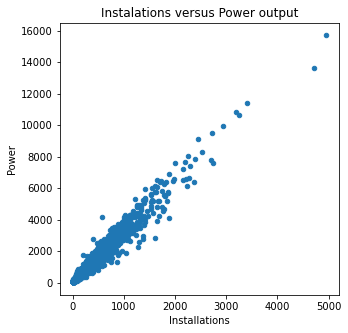

In [233]:
solar_wijk = solar_df.loc[solar_df['RegionType'] == 'Wijk']
solar_wijk.plot(
    x = 'Installations',
    y= 'Power',
    kind = 'scatter',
    figsize = (5,5),
    title = 'Instalations versus Power output'
)

In [234]:
print(Solar_buurt.loc[(Solar_buurt['Installations'] > 4000), 'Municipality'])
print('geen één...')

Series([], Name: Municipality, dtype: object)
geen één...
